In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, read_csv

mars = read_csv('data/mars.csv').fillna(0)
rpm = read_csv('data/rpm.csv').fillna(0)
surveys = read_csv('data/surveys.csv')
reject = read_csv('data/reject.csv')

mars = mars[mars.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)
rpm = rpm[rpm.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)
surveys = surveys[surveys.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)

In [2]:
counts = mars.groupby('item').shape_set.value_counts()
counts[[71, 55, 30, 45, 11, 29, 16, 17, 23, 58, 35, 76]]

item  shape_set
71    2            83
      1            52
      3            30
55    3            83
      2            65
      1            17
30    1            96
      3            52
      2            17
45    2            83
      1            52
      3            30
11    3            83
      2            65
      1            17
29    1            96
      3            52
      2            17
16    2            83
      1            52
      3            30
17    3            83
      2            65
      1            17
23    1            96
      3            52
      2            17
58    2            83
      1            52
      3            30
35    3            83
      2            65
      1            17
76    1            96
      3            52
      2            17
Name: shape_set, dtype: int64

In [3]:
scores = DataFrame([
    mars.groupby('subject').accuracy.sum(),
    rpm.groupby('subject').accuracy.sum(),
]).T
scores.columns = ['mars', 'rpm']

weights = [0.198,0.216,0.237,0.142,0.374,0.304,0.178,0.458,0.289];
X = 1 - rpm.pivot_table('accuracy','subject','trial').values
err = rpm.trial.max() - scores['rpm']
scores['rpm_adj'] = 60 - (err + np.exp(1.323 + X @ weights))
scores['neuroticism'] = surveys[surveys.filter(regex='neuroticism_q').columns[:-1]].sum(axis=1).values
scores['openness'] = surveys[surveys.filter(regex='openness_q').columns[:-1]].sum(axis=1).values
scores['nfc6'] = surveys[surveys.filter(regex='nfc6_q').columns[:-1]].sum(axis=1).values

In [4]:
scores.corr(method='pearson').round(3)

,mars,rpm,rpm_adj,neuroticism,openness,nfc6
mars,1.000,0.527,0.543,0.050,0.186,0.090
rpm,0.527,1.000,0.963,0.008,0.116,0.302
rpm_adj,0.543,0.963,1.000,0.019,0.079,0.267
neuroticism,0.050,0.008,0.019,1.000,0.224,-0.210
openness,0.186,0.116,0.079,0.224,1.000,0.165
nfc6,0.090,0.302,0.267,-0.210,0.165,1.000


<AxesSubplot:xlabel='mars_x', ylabel='rpm_y'>

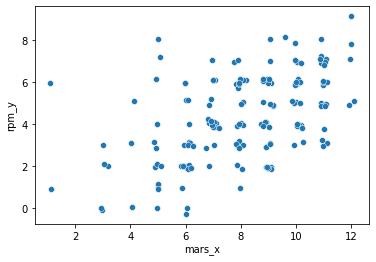

In [5]:
scores['mars_x'] = scores['mars'] + np.random.normal(0, 0.1, len(scores))
scores['rpm_y'] = scores['rpm'] + np.random.normal(0, 0.1, len(scores))
sns.scatterplot(x='mars_x', y='rpm_y', data=scores)

<AxesSubplot:xlabel='mars', ylabel='count'>

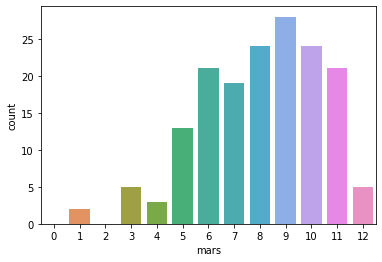

In [6]:
sns.countplot(x=scores['mars'], order=np.arange(13))

<AxesSubplot:xlabel='rpm', ylabel='count'>

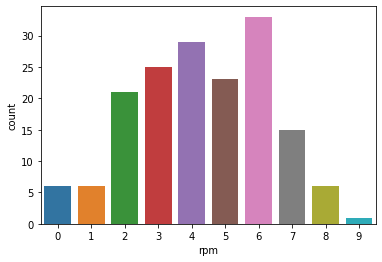

In [7]:
sns.countplot(x=scores['rpm'], order=np.arange(10))